<a href="https://colab.research.google.com/github/poorvaja-s-hub/Predictive-Modeling-for-Treatment-Outcomes-in-Alcohol-and-Nicotine-Use-Disorders/blob/main/Predictive_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modelling for Drug Consumption Analysis**
This project involves building predictive models to analyze drug consumption data. The objective is to preprocess the data, implement various machine learning models, and evaluate their performance in predicting the consumption of different drugs based on various features.

## Importing Libraries and Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

pd.set_option('display.max_columns', None) # Use the full option name 'display.max_columns'


## Loading the dataset, dropping the 'ID' column which is not useful for our analysis.



In [ ]:
data = pd.read_csv('/content/Drug_Consumption.csv')
data = data.drop('ID', axis=1)
data.head()


,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## Data cleaning and pre-processing

In [ ]:
# Check for missing values
data.isna().sum().sum()

0

In [ ]:
print(f'Original shape of data with {data.shape[0]} rows and {data.shape[1]} columns')

Original shape of data with 1884 rows and 31 columns


### *Semer is a fake drug that. Since it is not a real drug those who claimed to have used Semer are assumed to be over claimers. We can not be sure these individuals have accurately recounted their drug use, therefore, we will remove these individuals from the data frame.*

In [ ]:
# Overclaimers
data.query("Semer != 'CL0'")

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
726,25-34,F,Left school at 16 years,Australia,White,-0.58016,0.32197,0.14143,-0.60633,0.12331,1.29221,0.76540,CL6,CL2,CL2,CL2,CL6,CL6,CL5,CL2,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
816,18-24,M,"Some college or university, no certificate or ...",Australia,Asian,-0.67825,1.74091,0.72330,0.13136,0.41594,0.88113,1.92173,CL3,CL0,CL0,CL0,CL6,CL4,CL5,CL0,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1515,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,-0.71126,0.07987,CL0,CL2,CL3,CL2,CL3,CL4,CL1,CL3,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1532,18-24,F,"Some college or university, no certificate or ...",USA,Other,-0.46725,0.80523,0.29338,2.03972,1.81175,-1.37983,-0.21575,CL5,CL6,CL0,CL4,CL6,CL3,CL6,CL4,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1697,35-44,F,University degree,USA,White,1.98437,-0.80615,2.15324,0.76096,-0.00665,1.29221,1.92173,CL6,CL0,CL0,CL3,CL5,CL6,CL4,CL2,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1768,18-24,M,Left school at 18 years,USA,Mixed-White/Black,-0.34799,1.28610,1.06238,-0.01729,-0.52745,0.52975,1.22470,CL4,CL3,CL0,CL3,CL6,CL6,CL6,CL0,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1805,18-24,F,Left school at 17 years,USA,White,1.23461,1.11406,1.06238,-1.47955,0.12331,0.88113,1.92173,CL4,CL3,CL0,CL2,CL6,CL6,CL3,CL5,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1822,18-24,F,University degree,USA,White,0.22393,-0.30033,0.88309,1.28610,-0.00665,0.88113,0.07987,CL4,CL0,CL0,CL2,CL5,CL6,CL5,CL2,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


In [ ]:
# We will drop overclaimers since, there answers might not truly be accurate
data = data.drop(data[data['Semer'] != 'CL0'].index)

# We will also drop unnecesary columns
data = data.drop(['Choc','Semer'], axis=1)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0


In [ ]:
# Binary encode gender
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'M' else 0)

## Encoding Features

In [ ]:
# Encode ordinal features
ordinal_features = ['Age',
                    'Education',
                    'Alcohol',
                    'Amyl',
                    'Amphet',
                    'Benzos',
                    'Cannabis',
                    'Coke',
                    'Crack',
                    'Ecstasy',
                    'Heroin',
                    'Ketamine',
                    'Legalh',
                    'LSD',
                    'Meth',
                    'Mushrooms',
                    'Nicotine',
                    'VSA'    ]

# Define ordinal orderings
ordinal_orderings = [
    ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
    ['Left school before 16 years',
     'Left school at 16 years',
     'Left school at 17 years',
     'Left school at 18 years',
     'Some college or university, no certificate or degree',
     'Professional certificate/ diploma',
     'University degree',
     'Masters degree',
     'Doctorate degree'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],
    ['CL0','CL1','CL2','CL3','CL4','CL5','CL6']
]

# Nominal features
nominal_features = ['Country',
                    'Ethnicity']



In [ ]:
def ordinal_encoder(df, columns, ordering):
    df = df.copy()
    for column, ordering in zip(columns, ordering): # Changed ordinal_features to columns
        # Handle cases where value is not in the ordering
        df[column] = df[column].apply(lambda x: ordering.index(x) if x in ordering else -1)
    return df

def cat_converter(df, columns):
    df = df.copy()
    for column in columns:
        df[column] = df[column].astype('category').cat.codes.astype('int') # Convert codes to integers
    return df

In [ ]:
data = ordinal_encoder(data, ordinal_features, ordinal_orderings)
data = cat_converter(data, nominal_features)

In [ ]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,CL6,4,3,0,4,0,2,0,2,3,0,4,0
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,CL6,3,0,0,0,0,0,0,0,0,1,0,0
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,CL5,2,2,0,0,0,2,0,0,0,0,2,0
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,CL6,3,0,0,1,0,0,1,0,0,2,2,0
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,0,0,0,CL6,0,0,0,0,0,0,0,0,0,0,6,0


In [ ]:
data.dtypes

Age            int64
Gender         int64
Education      int64
Country        int64
Ethnicity      int64
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int64
Amphet         int64
Amyl           int64
Benzos         int64
Caff          object
Cannabis       int64
Coke           int64
Crack          int64
Ecstasy        int64
Heroin         int64
Ketamine       int64
Legalh         int64
LSD            int64
Meth           int64
Mushrooms      int64
Nicotine       int64
VSA            int64
dtype: object

In [ ]:
data.describe()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Cannabis,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,VSA
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.00000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,1.349680,0.501066,4.995203,4.825160,5.742004,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,0.005412,-0.006782,4.637527,1.337420,0.607143,1.46162,2.981876,1.157249,0.295842,1.310235,0.372601,0.564499,1.353945,1.053838,0.826759,1.178571,3.195629,0.429638
std,1.278042,0.500132,1.764684,1.409047,1.021667,0.998682,0.997596,0.995866,0.996730,0.997923,0.954389,0.961949,1.328562,1.782794,1.064197,1.86965,2.286352,1.510958,0.836120,1.647534,1.035001,1.216595,1.791086,1.484778,1.648708,1.459348,2.416301,0.959364
min,0.000000,0.000000,0.000000,0.000000,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000,5.000000,6.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,5.000000,5.000000,6.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,2.000000,1.000000,6.000000,6.000000,6.000000,0.629670,0.637790,0.723300,0.760960,0.628243,0.529750,0.765400,6.000000,2.000000,1.000000,3.00000,5.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,5.000000,1.000000,8.000000,6.000000,6.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
drugs = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Cannabis','Coke',
        'Crack', 'Ecstasy', 'Heroin', 'Ketamine','Legalh',
        'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'VSA']

In [ ]:
drug_mean = []
for column in drugs:
    mean = data[column].mean()
    drug_mean.append(mean)

In [ ]:
drug_dic = {'drug': drugs,
            'average_use': drug_mean}
drug_use = pd.DataFrame.from_dict(drug_dic)
drug_use = drug_use.sort_values(['average_use'], ascending=False)

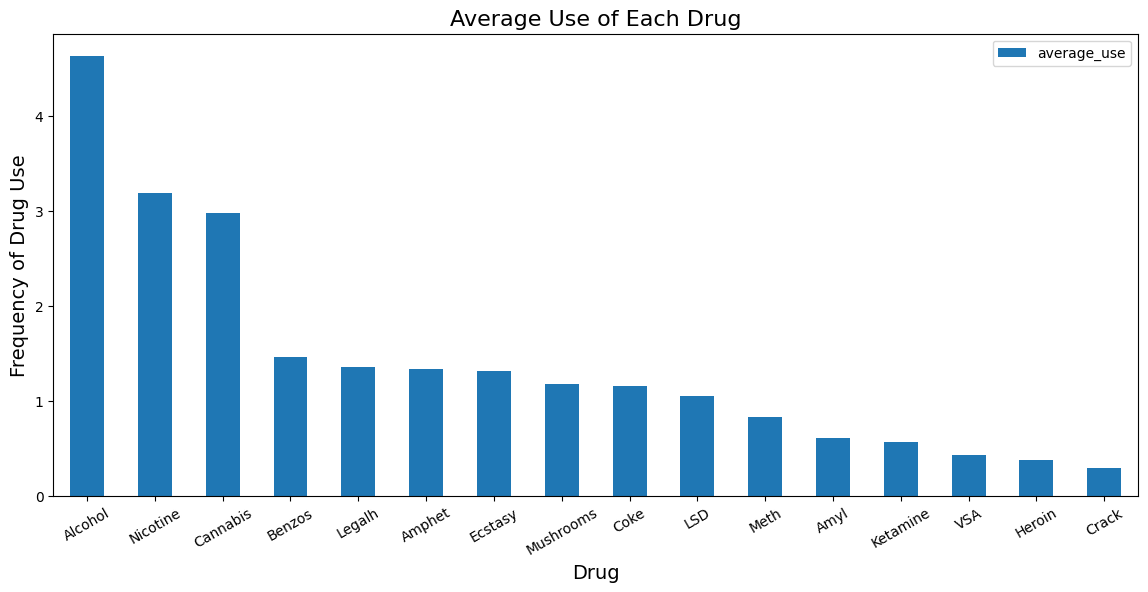

In [ ]:
drug_use.plot(kind='bar', x='drug', y='average_use', figsize=(14, 6))
plt.title('Average Use of Each Drug', size=16)
plt.xlabel('Drug', size=14)
plt.xticks(rotation=30)
plt.ylabel('Frequency of Drug Use', size=14)
plt.show()

In [ ]:
legal_df = data[['Age', 'Gender', 'Education', 'Country', 'Ethnicity',
                 'Nscore','Escore','Oscore', 'AScore','Cscore',
                 'Impulsive','SS','Alcohol','Nicotine', 'Benzos']]

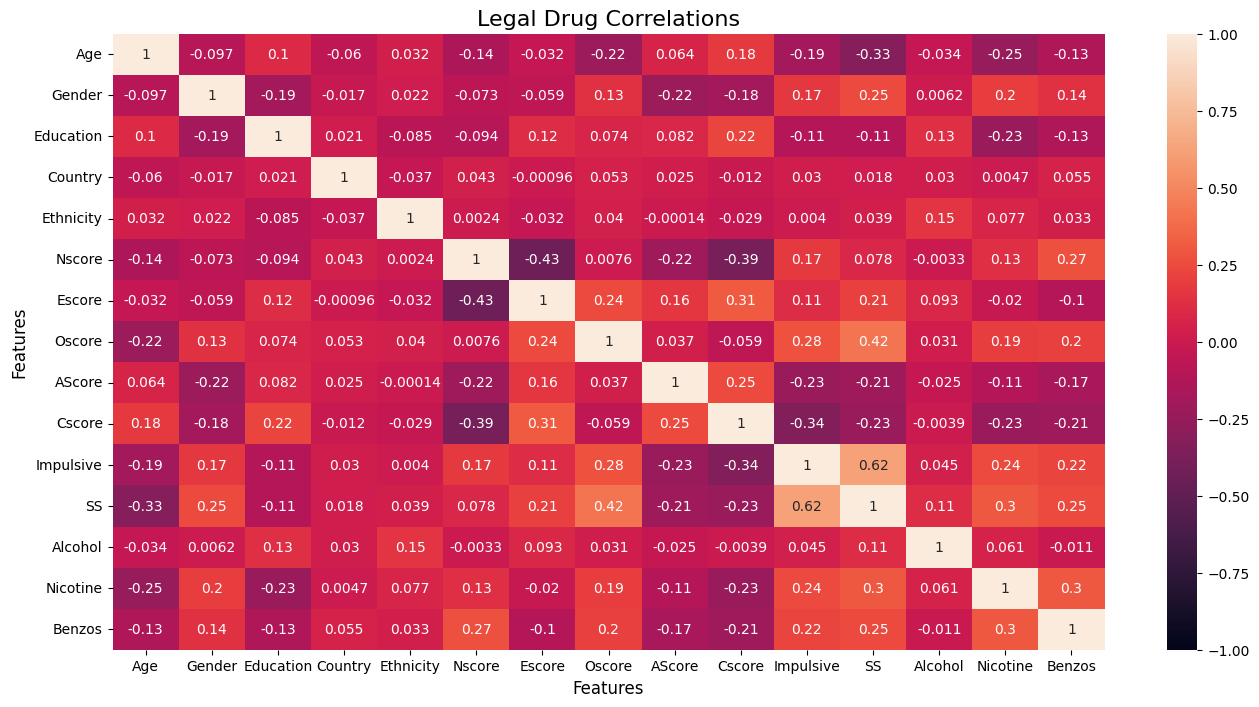

In [ ]:
corr = legal_df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, vmin=-1)
plt.title('Legal Drug Correlations', size=16)
plt.xlabel('Features', size=12)
plt.ylabel('Features', size=12)
plt.show()

<ipython-input-21-2132cc4d2159>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=ethnicities, rotation=20)


Text(0.5, 1.03, 'Ethnicity vs Alcohol')

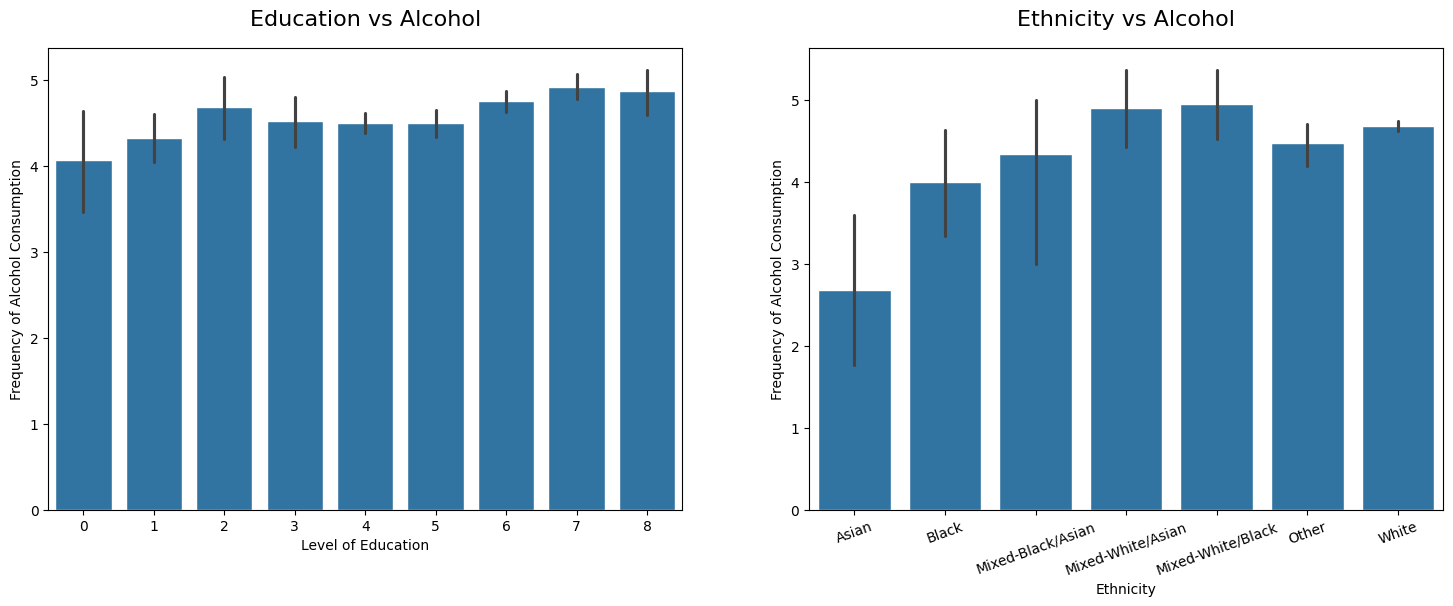

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
ethnicities = ['Asian','Black','Mixed-Black/Asian','Mixed-White/Asian','Mixed-White/Black','Other','White']
sns.set_style('whitegrid')
sns.barplot(data=legal_df, x='Education', y='Alcohol', ax=ax1)
sns.barplot(data=legal_df, x='Ethnicity', y='Alcohol', ax=ax2)
ax1.set(xlabel='Level of Education', ylabel='Frequency of Alcohol Consumption')
ax2.set(xlabel='Ethnicity', ylabel='Frequency of Alcohol Consumption')
ax2.set_xticklabels(labels=ethnicities, rotation=20)
ax1.set_title('Education vs Alcohol', y=1.03, fontsize=16)
ax2.set_title('Ethnicity vs Alcohol', y=1.03, fontsize=16)

<ipython-input-22-171418c91dfc>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x='SS', shade=True, hue='Alcohol', data=legal_df, palette='turbo')


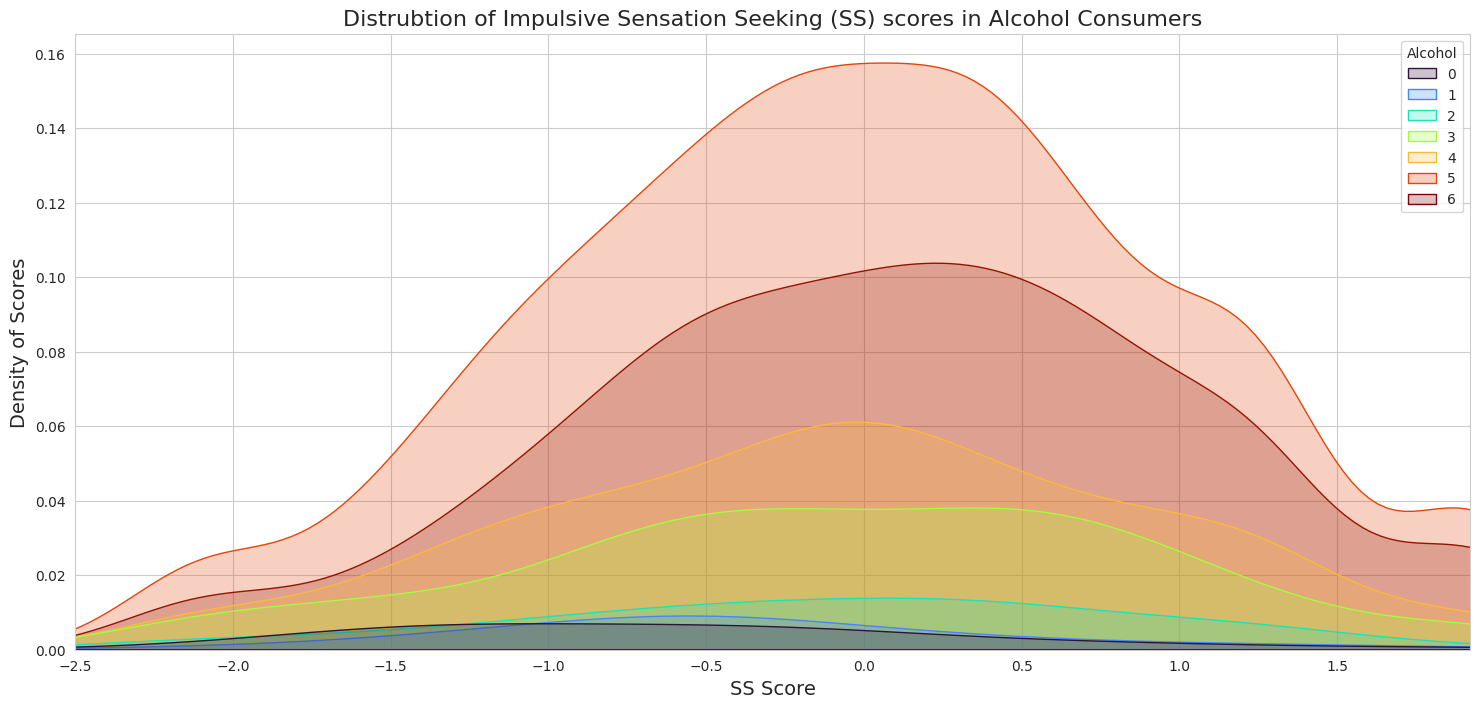

In [ ]:
plt.figure(figsize=(18,8))
sns.kdeplot(x='SS', shade=True, hue='Alcohol', data=legal_df, palette='turbo')
plt.title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Alcohol Consumers', size=16)
plt.xlim(-2.5, data['SS'].max())
plt.xlabel('SS Score', size=14)
plt.ylabel('Density of Scores', size=14)
plt.show()

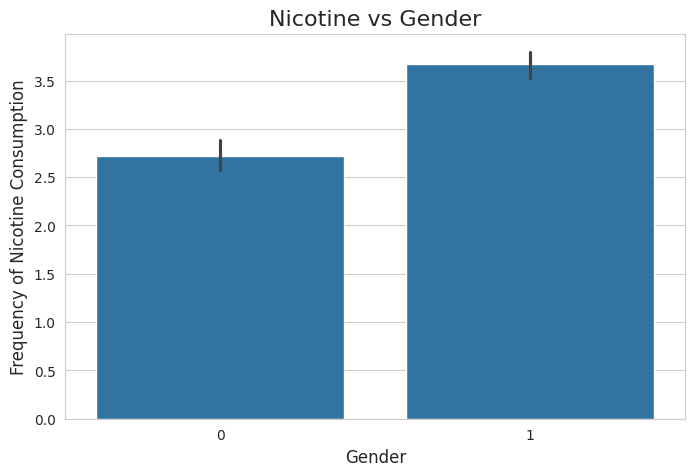

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=legal_df, x='Gender', y='Nicotine')
plt.title('Nicotine vs Gender', size=16)
plt.xlabel('Gender', size=12)
plt.ylabel('Frequency of Nicotine Consumption', size=12)
plt.show()

<ipython-input-24-78a3150cc0f4>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=frequency)
<ipython-input-24-78a3150cc0f4>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=frequency)


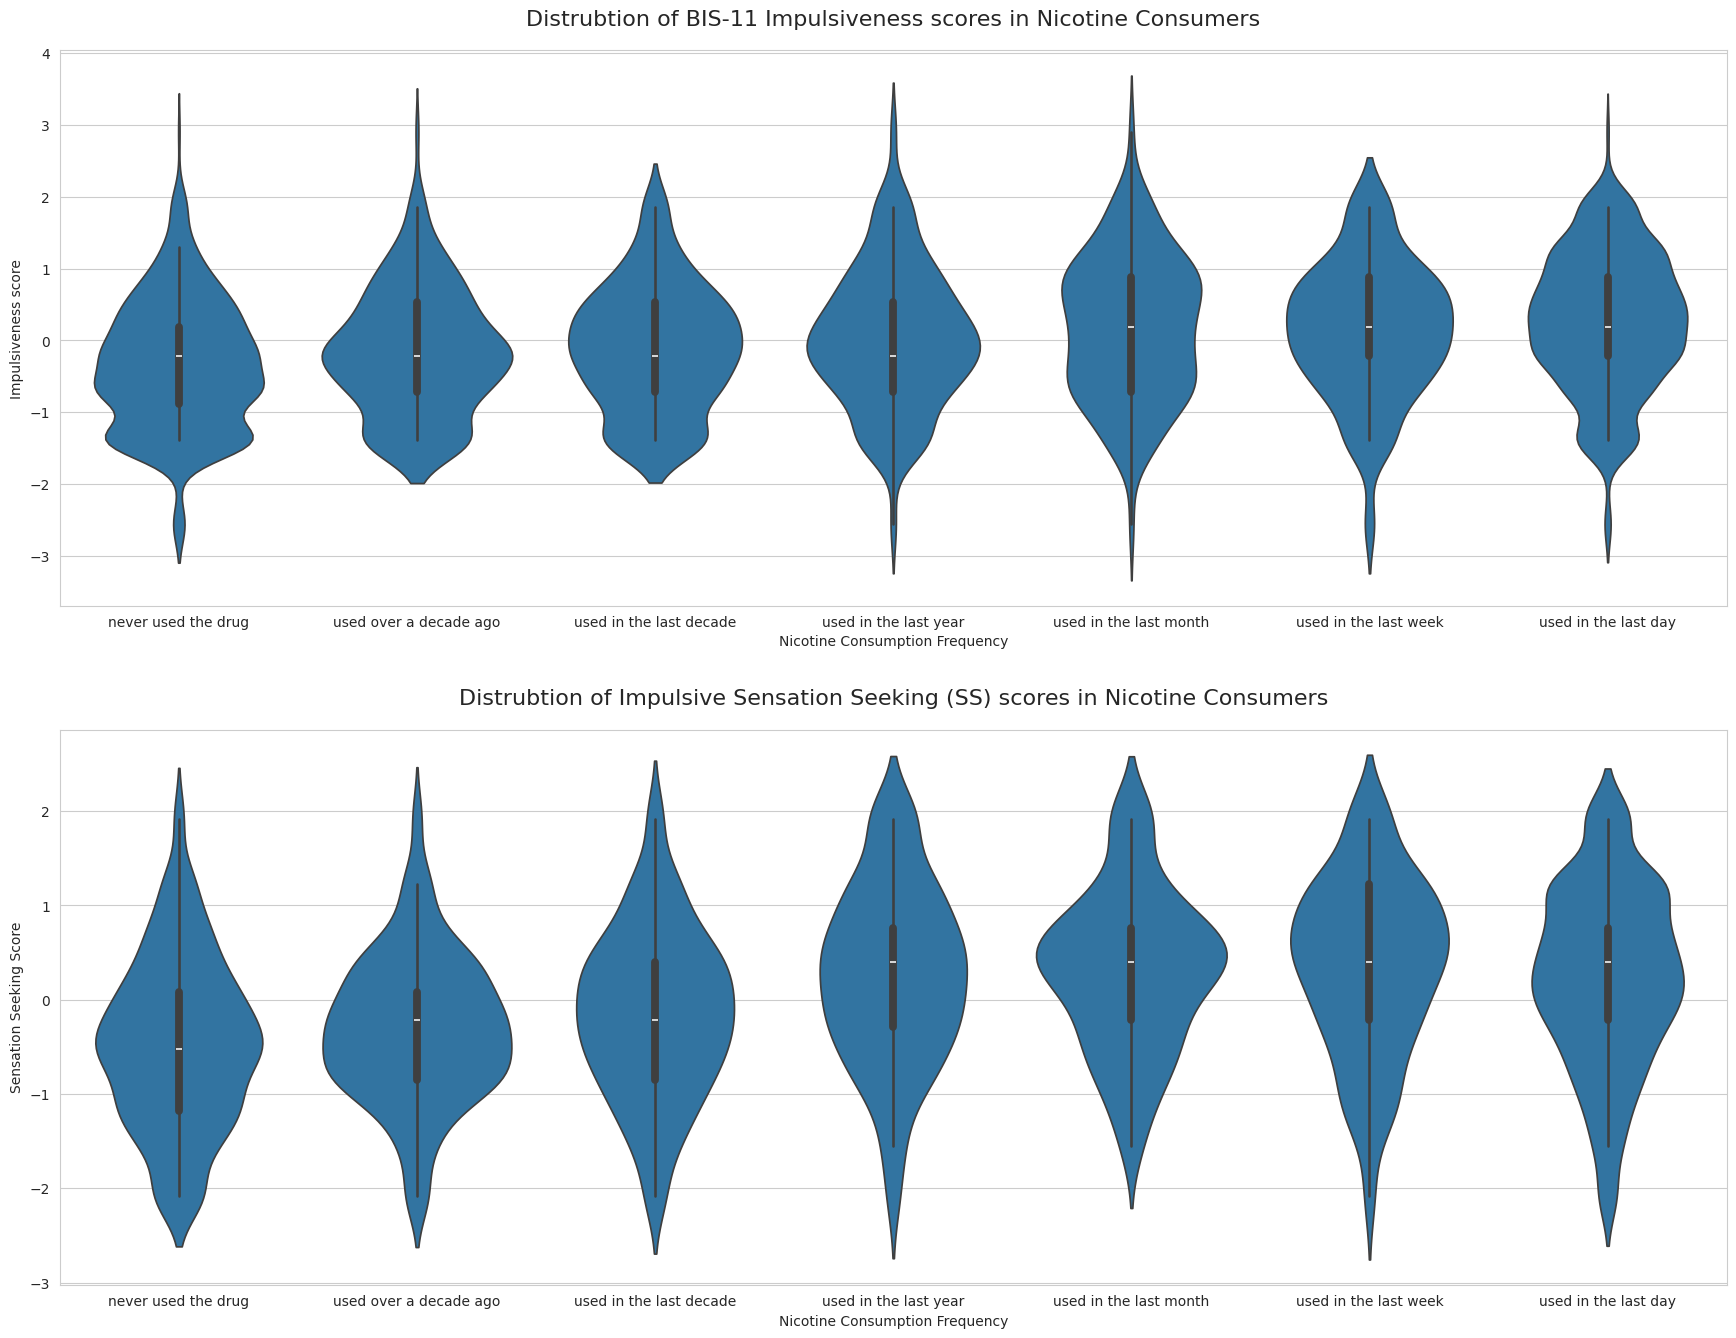

In [ ]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(18, 14))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Nicotine', y='Impulsive',  data=legal_df, ax=ax1)
sns.violinplot(x='Nicotine', y='SS', data=legal_df, ax=ax2)
ax1.set(xlabel = 'Nicotine Consumption Frequency', ylabel = 'Impulsiveness score')
ax2.set(xlabel = 'Nicotine Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of BIS-11 Impulsiveness scores in Nicotine Consumers', y=1.03, fontsize=16)
ax2.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Nicotine Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

<ipython-input-25-ddf06167c1f4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=frequency)
<ipython-input-25-ddf06167c1f4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=frequency)
<ipython-input-25-ddf06167c1f4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=frequency)


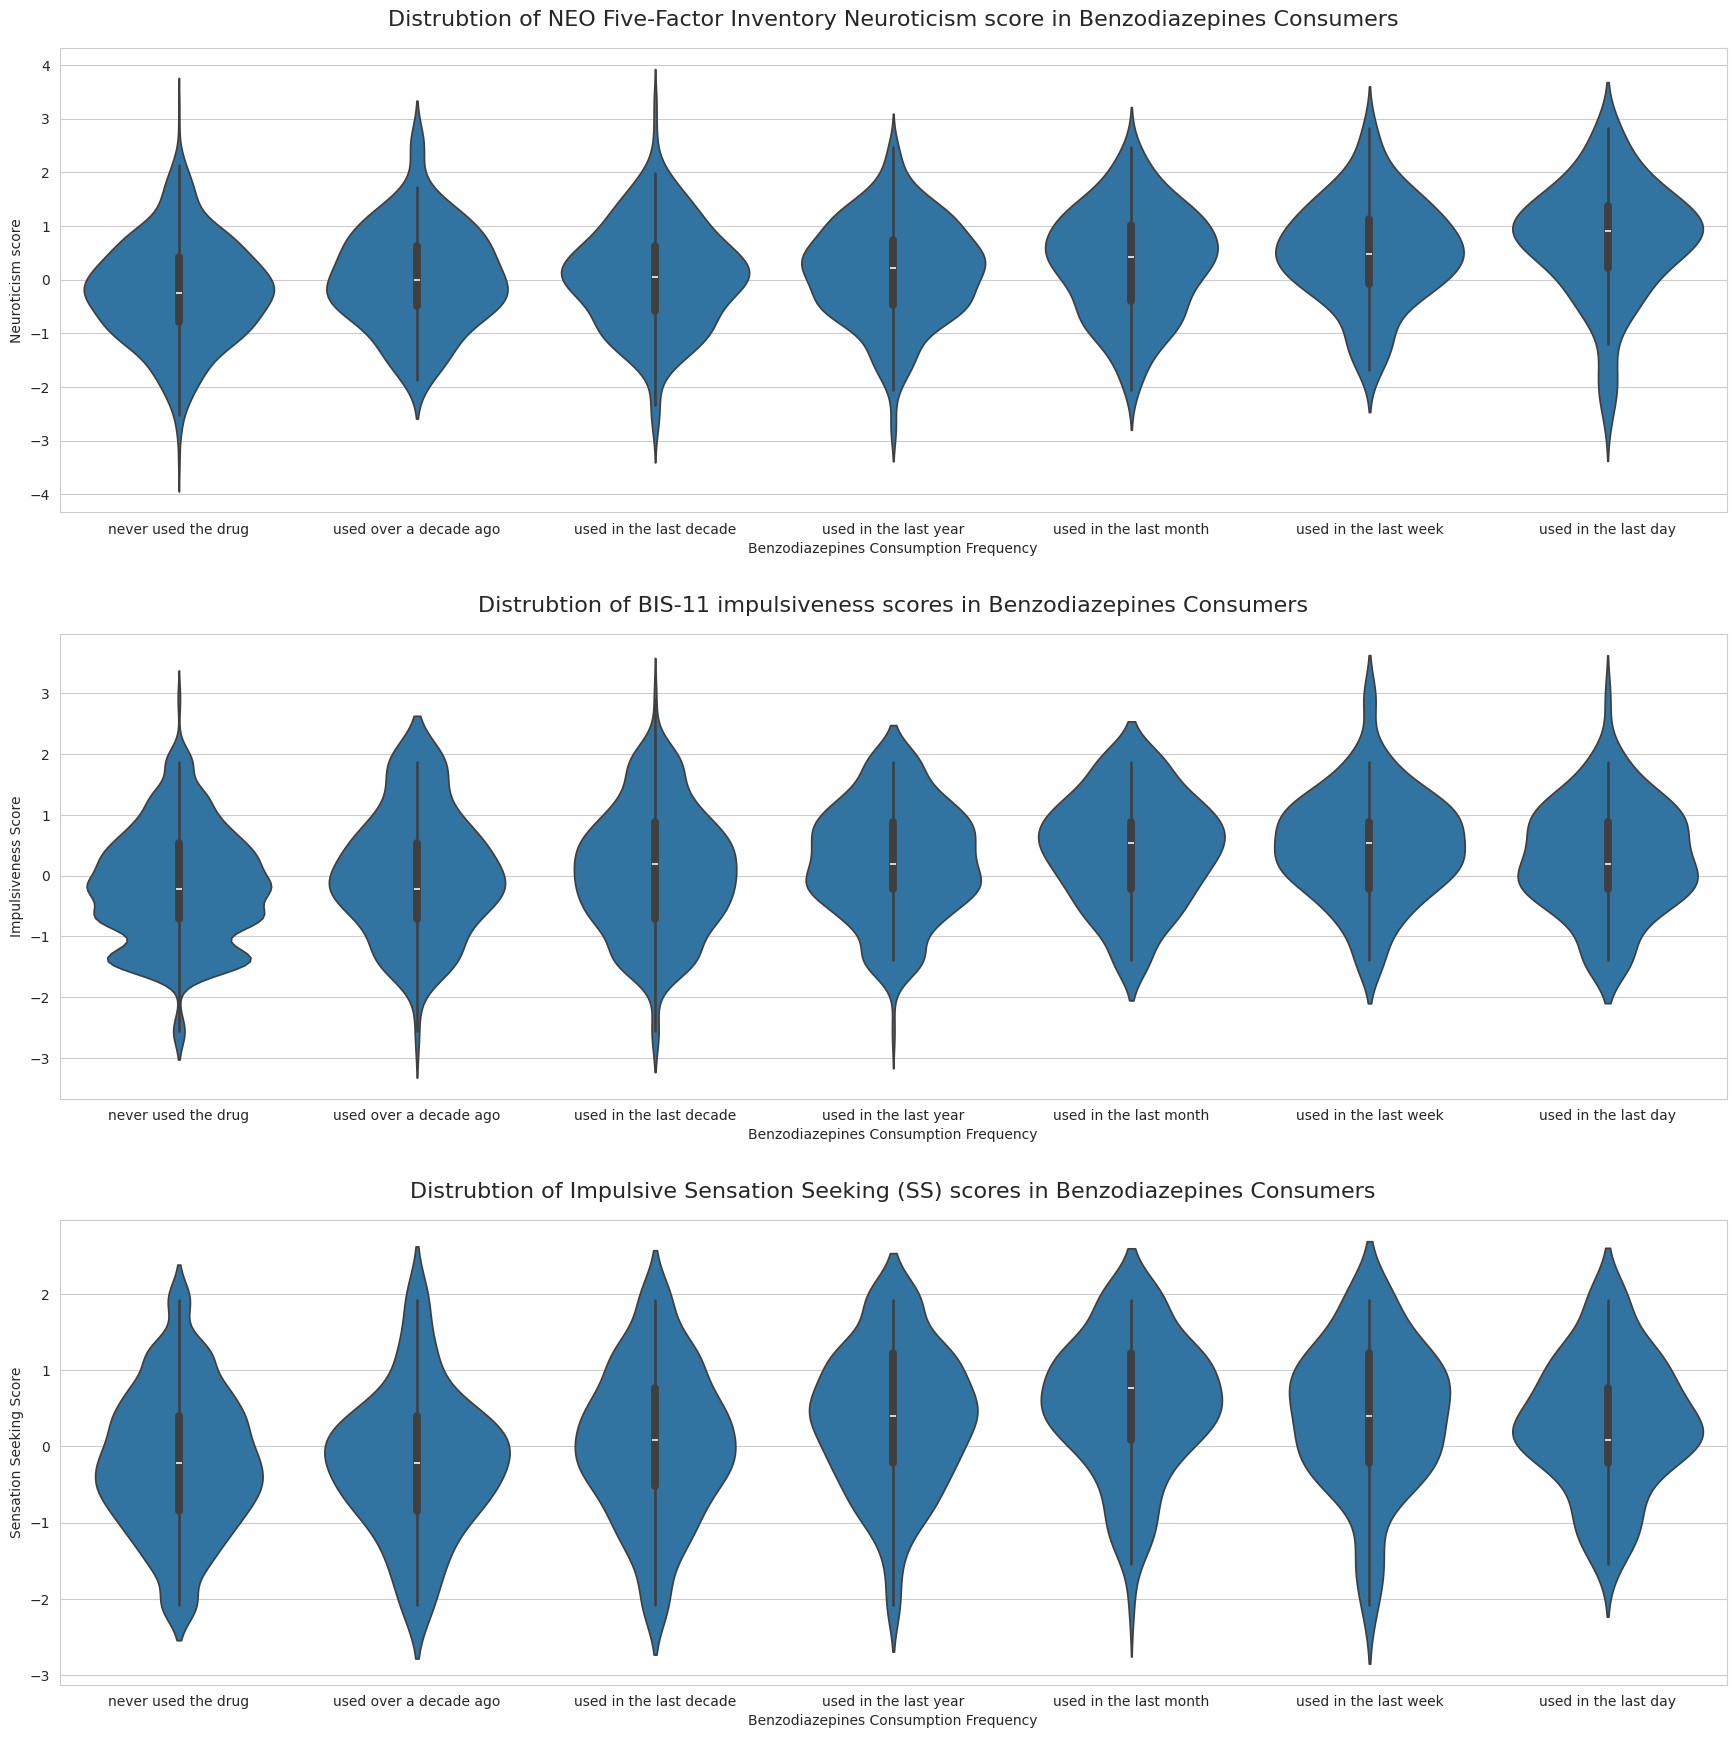

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(18, 18))
frequency = ['never used the drug', 'used over a decade ago', 'used in the last decade', 'used in the last year', 'used in the last month', 'used in the last week', 'used in the last day']
sns.violinplot(x='Benzos', y='Nscore',  data=legal_df, ax=ax1)
sns.violinplot(x='Benzos', y='Impulsive', data=legal_df, ax=ax2)
sns.violinplot(x='Benzos', y='SS', data=legal_df, ax=ax3)
ax1.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Neuroticism score')
ax2.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Impulsiveness Score')
ax3.set(xlabel = 'Benzodiazepines Consumption Frequency', ylabel = 'Sensation Seeking Score')
ax1.set_title('Distrubtion of NEO Five-Factor Inventory Neuroticism score in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax2.set_title('Distrubtion of BIS-11 impulsiveness scores in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax3.set_title('Distrubtion of Impulsive Sensation Seeking (SS) scores in Benzodiazepines Consumers', y=1.03, fontsize=16)
ax1.set_xticklabels(labels=frequency)
ax2.set_xticklabels(labels=frequency)
ax3.set_xticklabels(labels=frequency)
f.tight_layout(pad=3.0)

In [ ]:
both_df = legal_df.copy()
both_df['Nic_User'] = both_df['Nicotine'].apply(lambda x: 0.5 if x not in [0,1] else 0)
both_df['Benzo_User'] = both_df['Benzos'].apply(lambda x: 0.5 if x not in [0,1] else 0)
both_df['Both'] = both_df[['Nic_User', 'Benzo_User']].iloc[:].sum(axis=1)
both_df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Alcohol,Nicotine,Benzos,Nic_User,Benzo_User,Both
0,1,1,8,5,6,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,4,0,0.5,0.0,0.5
1,2,1,5,5,6,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0.0,0.0,0.0
2,0,0,7,5,6,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,2,3,0.5,0.5,1.0
3,2,0,8,5,6,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,2,0,0.5,0.0,0.5
4,5,0,3,1,6,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,2,6,0,0.5,0.0,0.5


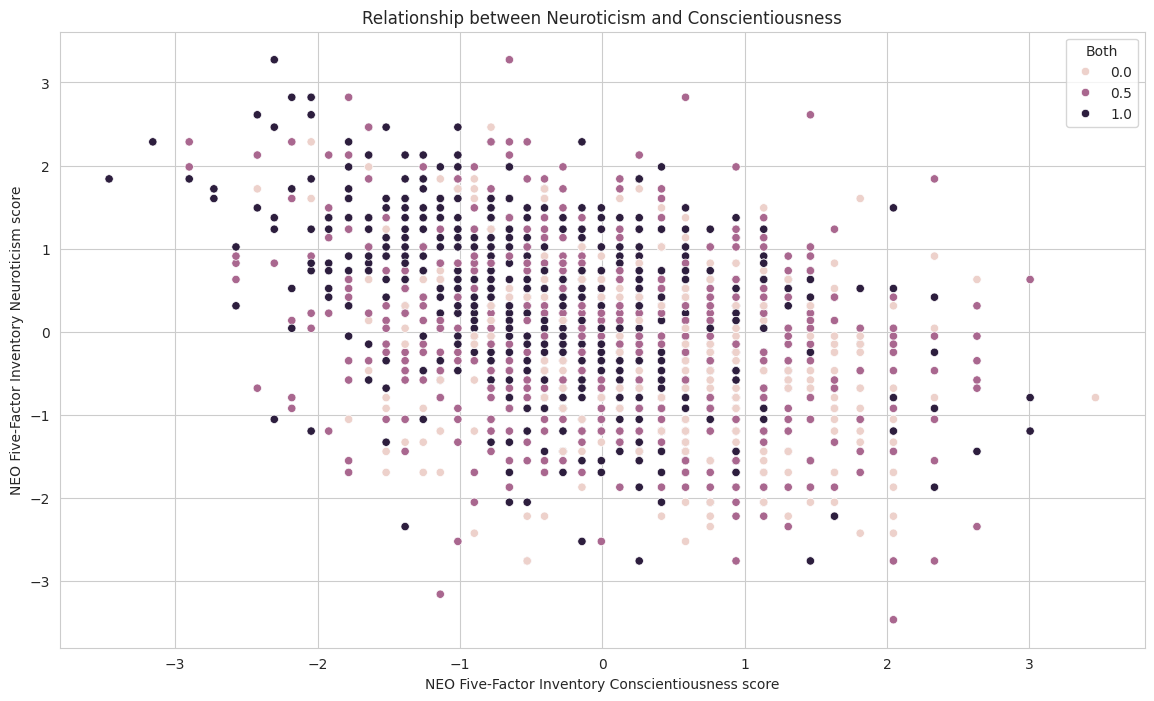

In [ ]:
# 0.0 = non nicotine or benzo consumer
# 0.5 = consumes either drug
# 1.0 = consumes both drugs
plt.figure(figsize=(14,8))
sns.scatterplot(data=both_df, x='Cscore', y='Nscore', hue='Both')
plt.title('Relationship between Neuroticism and Conscientiousness')
plt.xlabel('NEO Five-Factor Inventory Conscientiousness score')
plt.ylabel('NEO Five-Factor Inventory Neuroticism score')
plt.show()

## Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features and target variables
X = data.drop(columns=['Alcohol', 'Nicotine'])
y_alcohol = data['Alcohol']
y_nicotine = data['Nicotine']

# Identify columns with string values
string_columns = X.select_dtypes(include=['object']).columns

# Apply LabelEncoder to string columns
label_encoders = {}
for col in string_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store the encoders for later use if needed


# Train-test split for Alcohol
X_train_alcohol, X_test_alcohol, y_train_alcohol, y_test_alcohol = train_test_split(X, y_alcohol, test_size=0.2, random_state=42, stratify=y_alcohol)

# Train-test split for Nicotine
X_train_nicotine, X_test_nicotine, y_train_nicotine, y_test_nicotine = train_test_split(X, y_nicotine, test_size=0.2, random_state=42, stratify=y_nicotine)

# Feature scaling
scaler = StandardScaler()

# Fit and transform the scaler on the training data, then transform the test data for Alcohol
X_train_alcohol_scaled = scaler.fit_transform(X_train_alcohol)
X_test_alcohol_scaled = scaler.transform(X_test_alcohol)

# Fit and transform the scaler on the training data, then transform the test data for Nicotine
X_train_nicotine_scaled = scaler.fit_transform(X_train_nicotine)
X_test_nicotine_scaled = scaler.transform(X_test_nicotine)

## Model training and Hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Example models
models = [
    LogisticRegression(max_iter=1000),  # Increase max_iter as needed
    RandomForestClassifier(random_state=42),
    SVC()
]

model_names = ['Logistic Regression', 'Random Forest', 'SVM']

# Example parameter grids for hyperparameter tuning
param_grid = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1.0], 'solver': ['lbfgs', 'liblinear']},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'SVM': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}

print("Hyperparameter tuning for Alcohol consumption:")
for model, name in zip(models, model_names):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='accuracy')
    if name == 'Logistic Regression':
        grid_search.fit(X_train_alcohol_scaled, y_train_alcohol)
        best_lr_alcohol = grid_search.best_estimator_ # Store the best LR model for alcohol
    else:
        grid_search.fit(X_train_alcohol_scaled, y_train_alcohol)
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")


    # Train the model with the best parameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train_alcohol_scaled, y_train_alcohol)
    print(f"{name} model trained.")

    # Evaluate performance on test set
    y_pred_alcohol = best_model.predict(X_test_alcohol_scaled)
    accuracy = accuracy_score(y_test_alcohol, y_pred_alcohol)
    print(f"Accuracy on test set: {accuracy}")


Hyperparameter tuning for Alcohol consumption:
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Logistic Regression model trained.
Accuracy on test set: 0.4015957446808511
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 300}
Random Forest model trained.
Accuracy on test set: 0.36436170212765956
Best parameters for SVM: {'C': 0.1, 'kernel': 'rbf'}
SVM model trained.
Accuracy on test set: 0.40425531914893614


In [ ]:
print("Hyperparameter tuning for Nicotine consumption:")
for model, name in zip(models, model_names):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[name], cv=5, scoring='accuracy')
    if name == 'Logistic Regression':
        grid_search.fit(X_train_nicotine_scaled, y_train_nicotine)
        best_lr_nicotine = grid_search.best_estimator_ # Store the best LR model for nicotine
    else:
        grid_search.fit(X_train_nicotine_scaled, y_train_nicotine)
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")

    # Train the model with the best parameters
    best_model = model.set_params(**best_params)
    best_model.fit(X_train_nicotine_scaled, y_train_nicotine)
    print(f"{name} model trained.")

    # Evaluate performance on test set
    y_pred_nicotine = best_model.predict(X_test_nicotine_scaled)
    accuracy = accuracy_score(y_test_nicotine, y_pred_nicotine)
    print(f"Accuracy on test set: {accuracy}")

Hyperparameter tuning for Nicotine consumption:
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression model trained.
Accuracy on test set: 0.43617021276595747
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 300}
Random Forest model trained.
Accuracy on test set: 0.4601063829787234
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}
SVM model trained.
Accuracy on test set: 0.4654255319148936


## Model Performance Comparison

In [ ]:
# 1. Model Performance Comparison
# Print accuracy scores for each model
for name, model in zip(model_names, models):
    if name == 'Logistic Regression':
        y_pred_alcohol = model.predict(X_test_alcohol_scaled)
        y_pred_nicotine = model.predict(X_test_nicotine_scaled)
    else:
        y_pred_alcohol = model.predict(X_test_alcohol_scaled)
        y_pred_nicotine = model.predict(X_test_nicotine_scaled)
    accuracy_alcohol = accuracy_score(y_test_alcohol, y_pred_alcohol)
    accuracy_nicotine = accuracy_score(y_test_nicotine, y_pred_nicotine)
    print(f"Accuracy on test set for {name} (Alcohol): {accuracy_alcohol:.3f}")
    print(f"Accuracy on test set for {name} (Nicotine): {accuracy_nicotine:.3f}")
    print()


Accuracy on test set for Logistic Regression (Alcohol): 0.157
Accuracy on test set for Logistic Regression (Nicotine): 0.436

Accuracy on test set for Random Forest (Alcohol): 0.168
Accuracy on test set for Random Forest (Nicotine): 0.460

Accuracy on test set for SVM (Alcohol): 0.154
Accuracy on test set for SVM (Nicotine): 0.465



## Feature Importance Plot

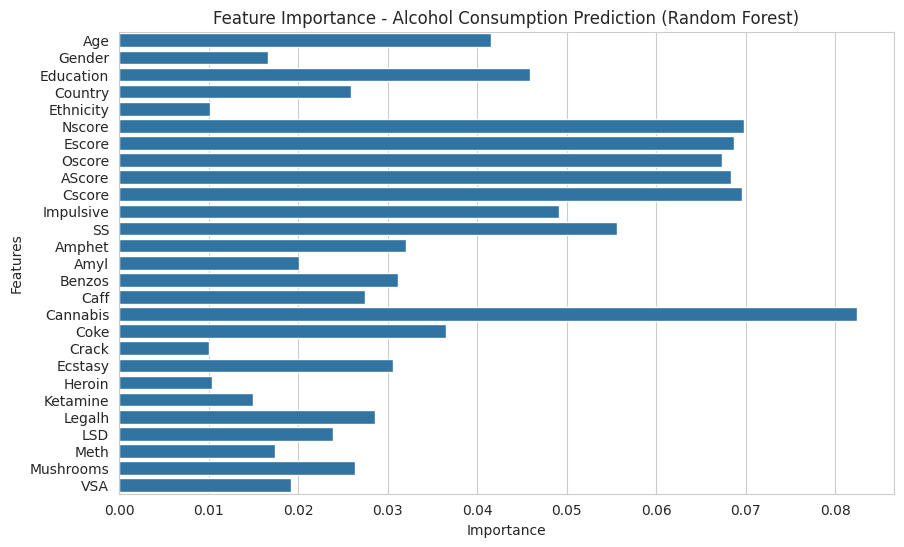

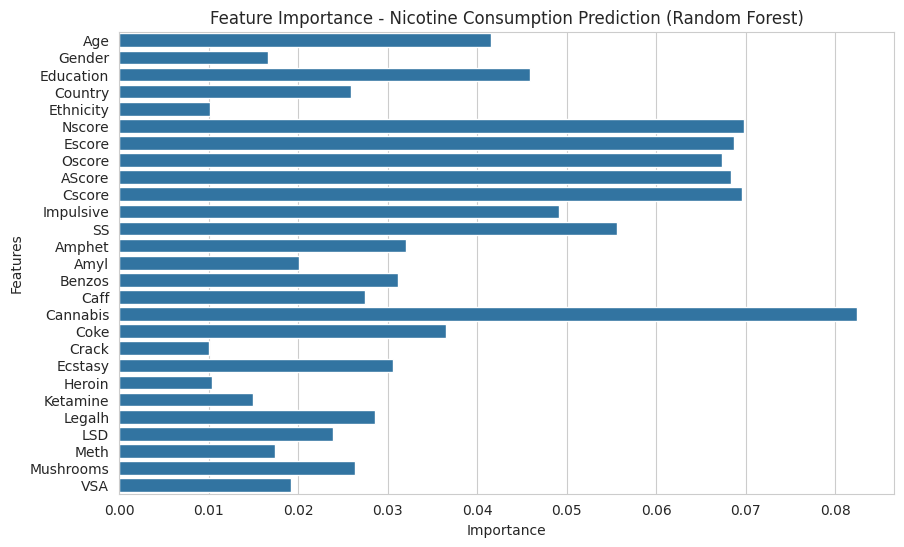

In [ ]:
# 2. Feature Importance Plot (for Random Forest)
if 'Random Forest' in model_names:
    best_rf_alcohol = models[model_names.index('Random Forest')]
    best_rf_nicotine = models[model_names.index('Random Forest')]
    feature_importance_alcohol = best_rf_alcohol.feature_importances_
    feature_importance_nicotine = best_rf_nicotine.feature_importances_

    # Plot feature importance for alcohol prediction
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_alcohol, y=X.columns)
    plt.title('Feature Importance - Alcohol Consumption Prediction (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

    # Plot feature importance for nicotine prediction
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_nicotine, y=X.columns)
    plt.title('Feature Importance - Nicotine Consumption Prediction (Random Forest)')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

## Confusion Matrix

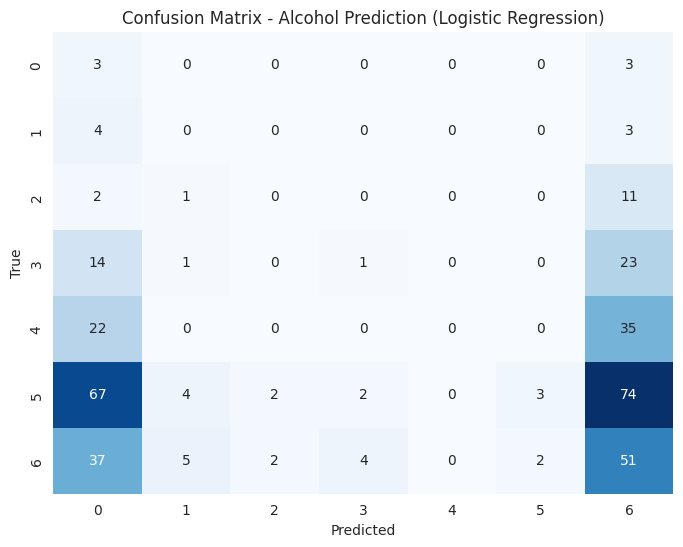

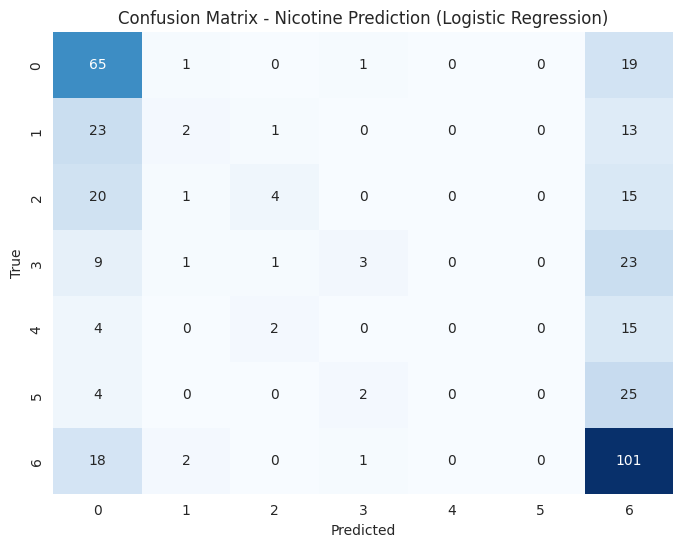

In [ ]:
# 3. Confusion Matrix
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for Logistic Regression (example)
plot_confusion_matrix(y_test_alcohol, y_pred_alcohol, title='Confusion Matrix - Alcohol Prediction (Logistic Regression)')
plot_confusion_matrix(y_test_nicotine, y_pred_nicotine, title='Confusion Matrix - Nicotine Prediction (Logistic Regression)')

##ROC Curve

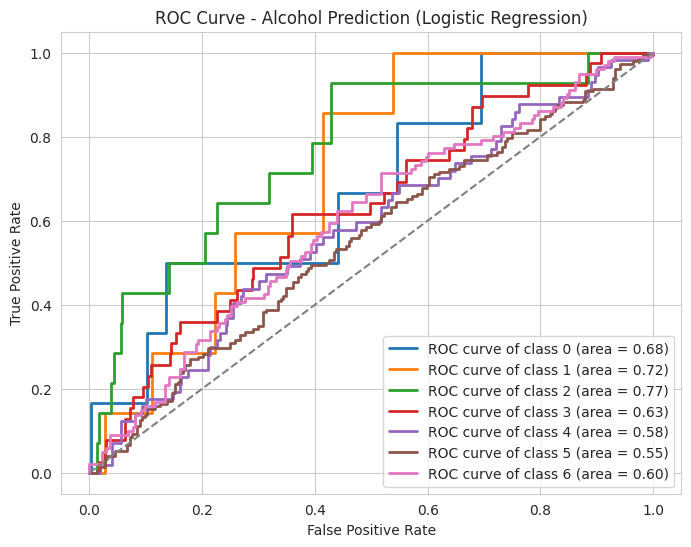

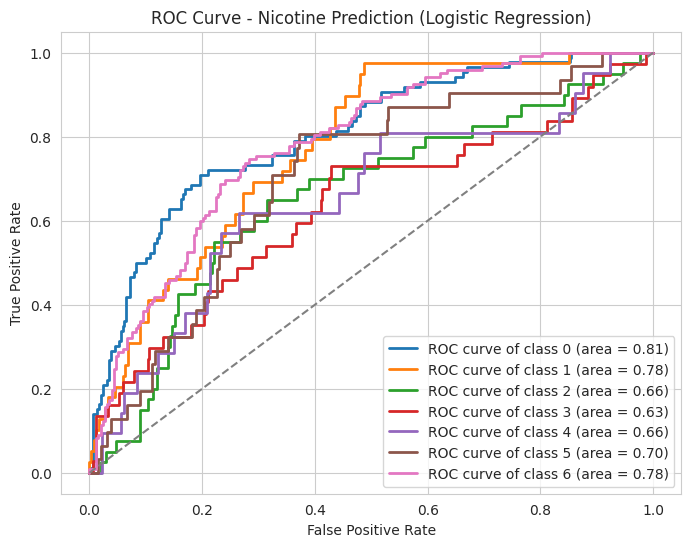

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output
y_test_alcohol_bin = label_binarize(y_test_alcohol, classes=np.unique(y_test_alcohol))
y_test_nicotine_bin = label_binarize(y_test_nicotine, classes=np.unique(y_test_nicotine))

# You need to binarize the training data as well for model fitting
y_train_alcohol_bin = label_binarize(y_train_alcohol, classes=np.unique(y_train_alcohol)) # Binarize y_train_alcohol
y_train_nicotine_bin = label_binarize(y_train_nicotine, classes=np.unique(y_train_nicotine)) # Binarize y_train_nicotine

# Alcohol prediction ROC curve
classifier = OneVsRestClassifier(best_lr_alcohol)
y_score_alcohol = classifier.fit(X_train_alcohol_scaled, y_train_alcohol_bin).predict_proba(X_test_alcohol_scaled)

# Compute ROC curve and ROC area for each class
fpr_alcohol = dict()
tpr_alcohol = dict()
roc_auc_alcohol = dict()
n_classes = y_test_alcohol_bin.shape[1]
for i in range(n_classes):
    fpr_alcohol[i], tpr_alcohol[i], _ = roc_curve(y_test_alcohol_bin[:, i], y_score_alcohol[:, i])
    roc_auc_alcohol[i] = auc(fpr_alcohol[i], tpr_alcohol[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr_alcohol[i], tpr_alcohol[i], lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc_alcohol[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Alcohol Prediction (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()


# Nicotine prediction ROC curve
classifier_nicotine = OneVsRestClassifier(best_lr_nicotine) # Assuming best_lr_nicotine is defined
y_score_nicotine = classifier_nicotine.fit(X_train_nicotine_scaled, y_train_nicotine_bin).predict_proba(X_test_nicotine_scaled)

# Compute ROC curve and ROC area for each class for nicotine
fpr_nicotine = dict()
tpr_nicotine = dict()
roc_auc_nicotine = dict()
n_classes_nicotine = y_test_nicotine_bin.shape[1]
for i in range(n_classes_nicotine):
    fpr_nicotine[i], tpr_nicotine[i], _ = roc_curve(y_test_nicotine_bin[:, i], y_score_nicotine[:, i])
    roc_auc_nicotine[i] = auc(fpr_nicotine[i], tpr_nicotine[i])

# Plot ROC curves for each class for nicotine
plt.figure(figsize=(8, 6))
for i in range(n_classes_nicotine):
    plt.plot(fpr_nicotine[i], tpr_nicotine[i], lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc_nicotine[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Nicotine Prediction (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()
